In [1]:
!pip install tensorflow numpy matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━

# Generate More Data
*Use Image Data Generator to generate more data than what we collected*

In [3]:
collected_data_path = "/Users/shaurya/Downloads/watermelon/data"

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,               # Normalize pixel values to [0, 1]
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Apply shear transformations
    zoom_range=0.2,                 # Randomly zoom in/out
    validation_split=0.2            # Split data for validation
)

# Step 2: Prepare your data with augmentation
train_generator = train_datagen.flow_from_directory(
    collected_data_path,  # Replace with your data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    collected_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 37 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [7]:
!pip install scipy

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)


*Check to see how the train dataset worked*

Total samples in training set: 37
Number of classes: 2
32  labels:  32


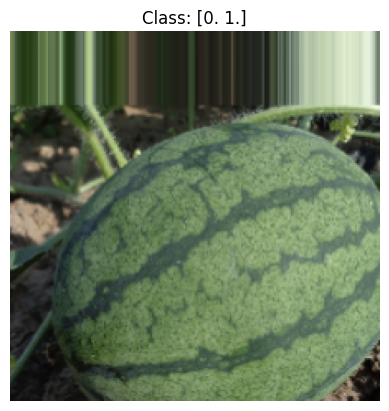

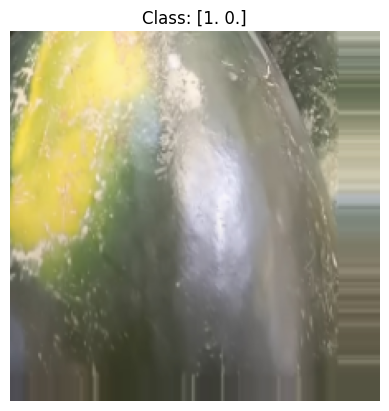

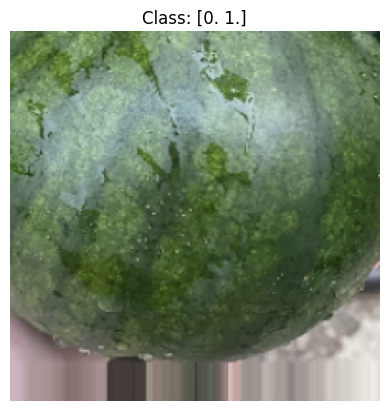

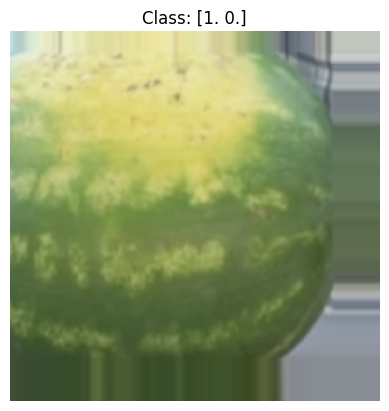

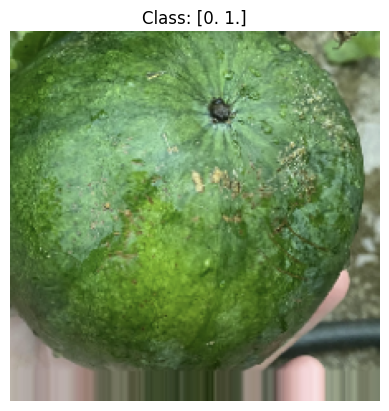

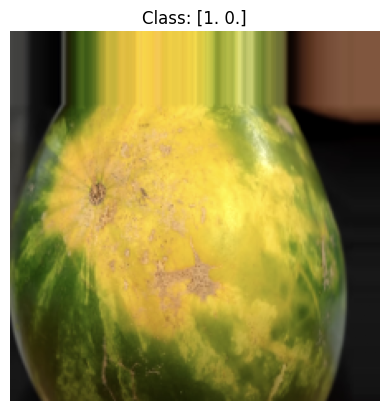

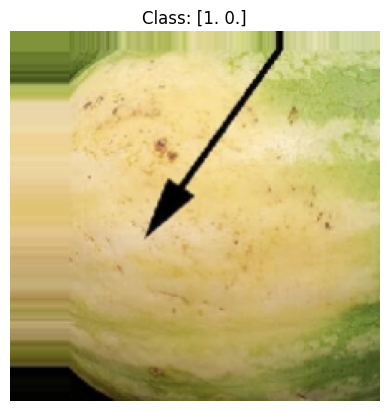

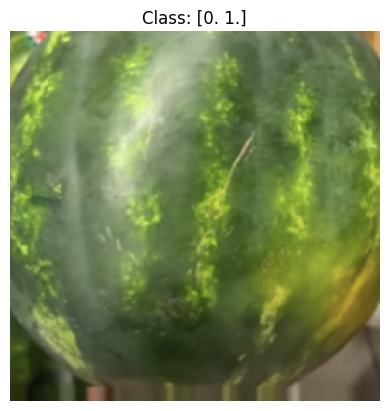

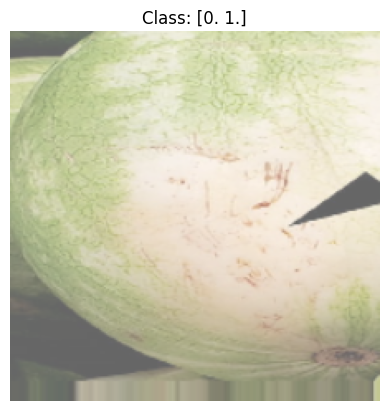

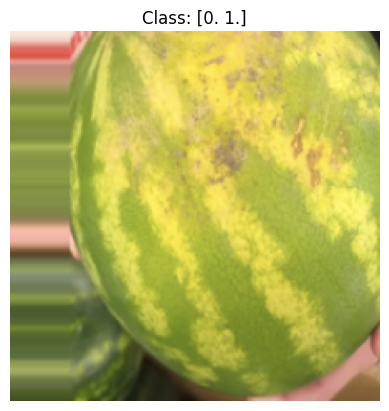

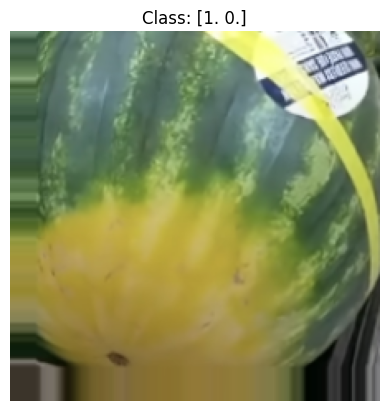

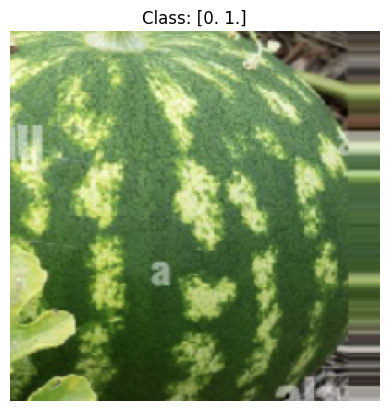

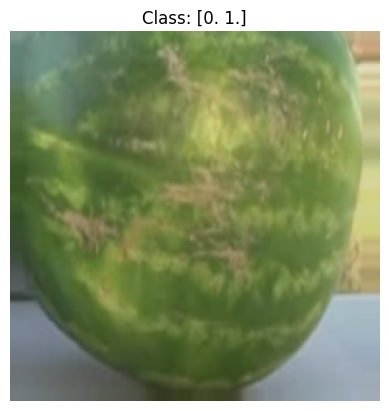

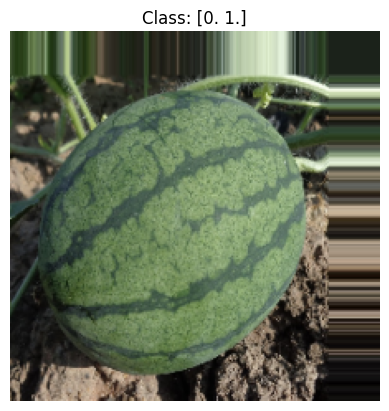

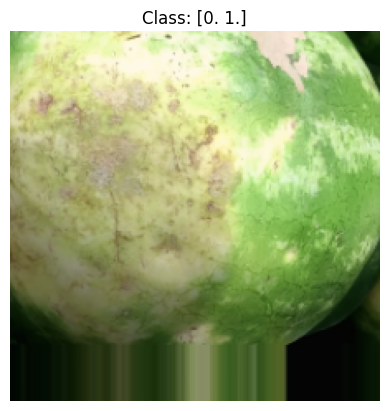

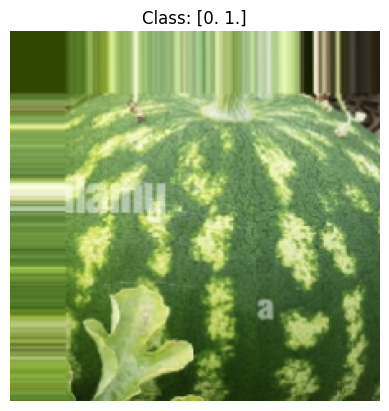

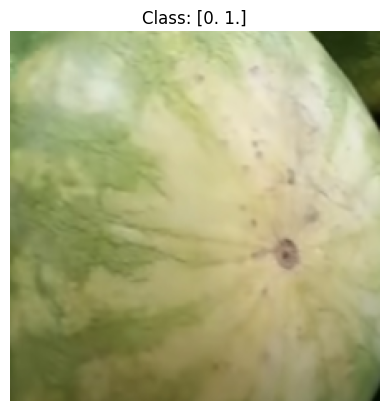

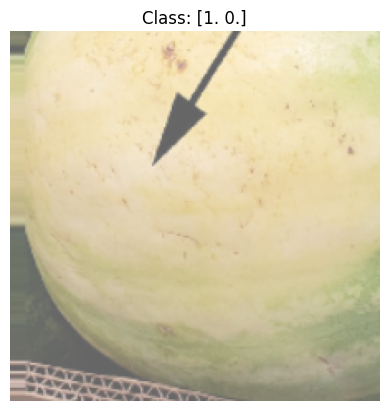

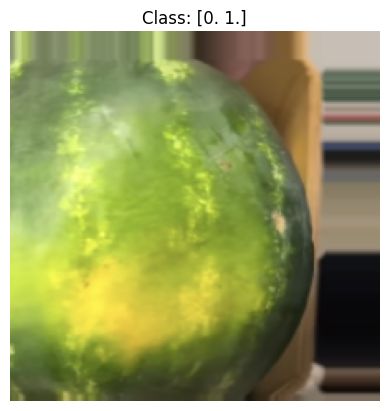

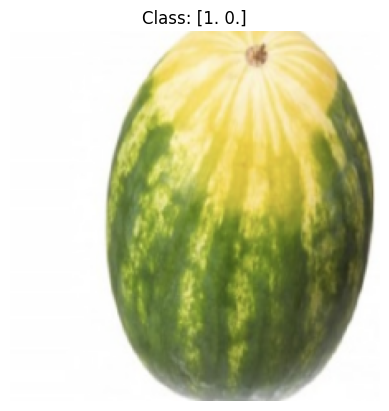

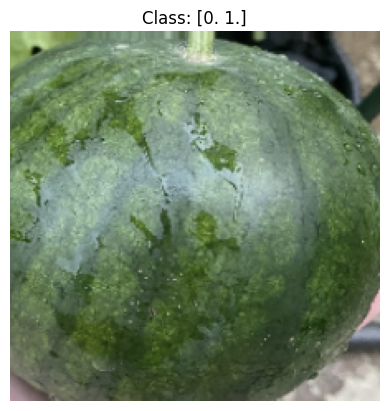

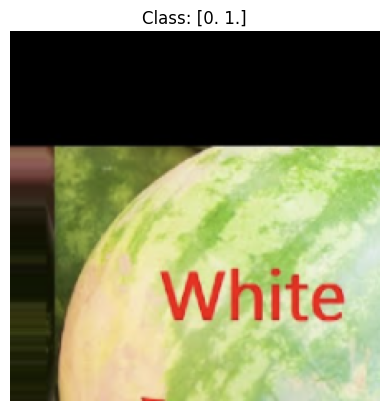

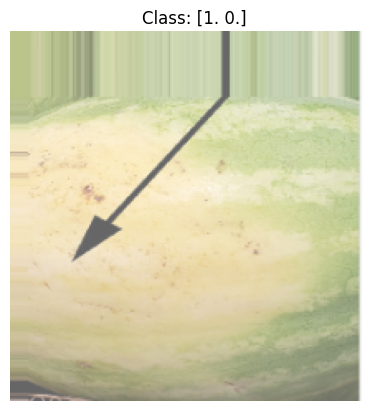

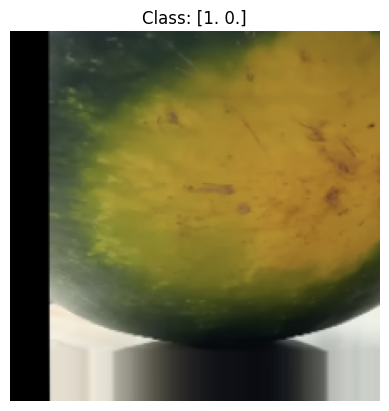

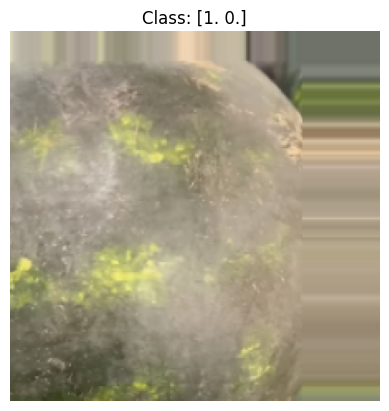

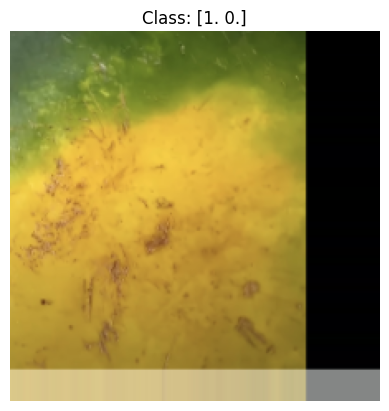

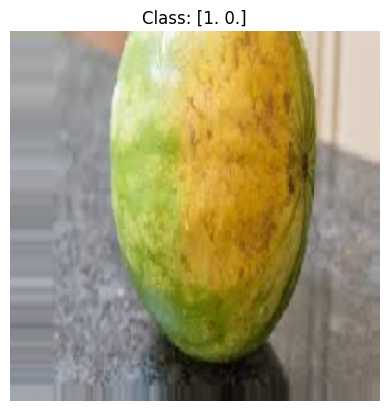

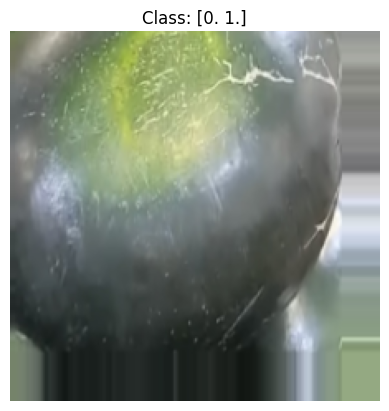

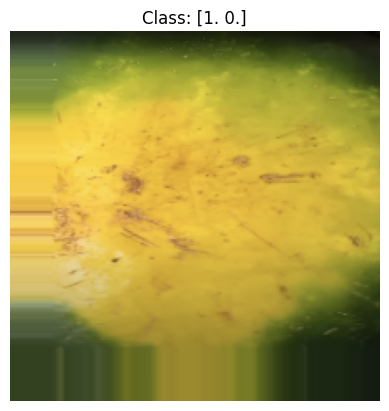

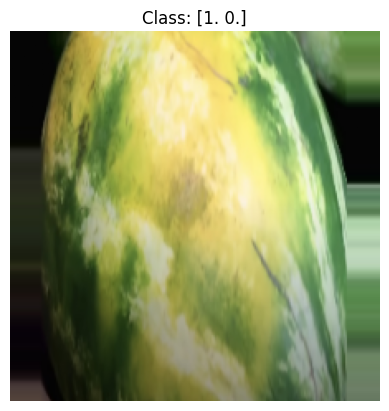

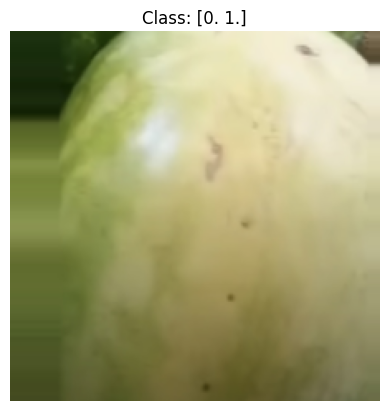

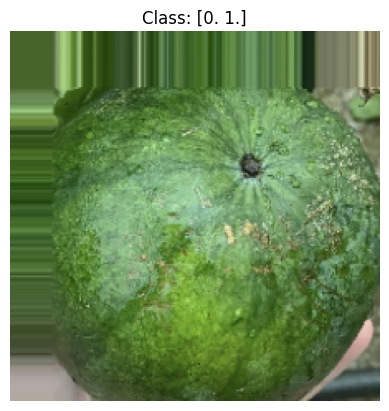

In [8]:
import matplotlib.pyplot as plt

show_all_images = True

print(f'Total samples in training set: {train_generator.n}')
print(f'Number of classes: {train_generator.num_classes}')

# Step 2: Get a sample image
# Get one batch of images and labels
images, labels = next(train_generator)

print(len(images), " labels: ", len(labels))
if show_all_images == True:
    for i in range(0, len(images)):   
        # Step 3: Print a sample image
        # Display the first image in the batch
        plt.imshow(images[i])  # Images are in the range [0, 1]
        plt.title(f'Class: {labels[i]}')  # Show the corresponding label
        plt.axis('off')  # Hide axes
        plt.show()

# Train Model
* Download the pre-trained model from imagenet.

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


**Download pre-trained model from imagenet**

In [10]:

# Step 1: Load the pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Model classes
num_classes = 2

# Freeze the base model layers
base_model.trainable = False
total_dense_neurons = 1024

# Step 2: Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(total_dense_neurons, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Replace num_classes with your number of classes

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Prepare your data
# Train and Validation data generator is already defined in the above cells.
# Step 5: Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20  # Adjust epochs as needed
)

# Optional: Fine-tune the model
'''
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20 # Adjust epochs as needed
)
'''


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 953ms/step - accuracy: 0.6123 - loss: 0.7129 - val_accuracy: 0.6667 - val_loss: 1.9204
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.7157 - loss: 0.8442 - val_accuracy: 0.8889 - val_loss: 0.2587
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step - accuracy: 0.9820 - loss: 0.0559 - val_accuracy: 0.7778 - val_loss: 0.3537
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.9431 - loss: 0.0853 - val_accuracy: 1.0000 - val_loss: 0.0890
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.8889 - val_loss: 0.4295
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.9716 - loss: 0.0498 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 1.0000 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.1022
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 0.8889 - val_loss:

"\nbase_model.trainable = True\nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n\nmodel.fit(\n    train_generator,\n    validation_data=validation_generator,\n    epochs=20 # Adjust epochs as needed\n)\n"

In [16]:
import keras
# Save the model
keras.saving.save_model(model, 'watermelon_v1.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
num images:  9  predictions:  9


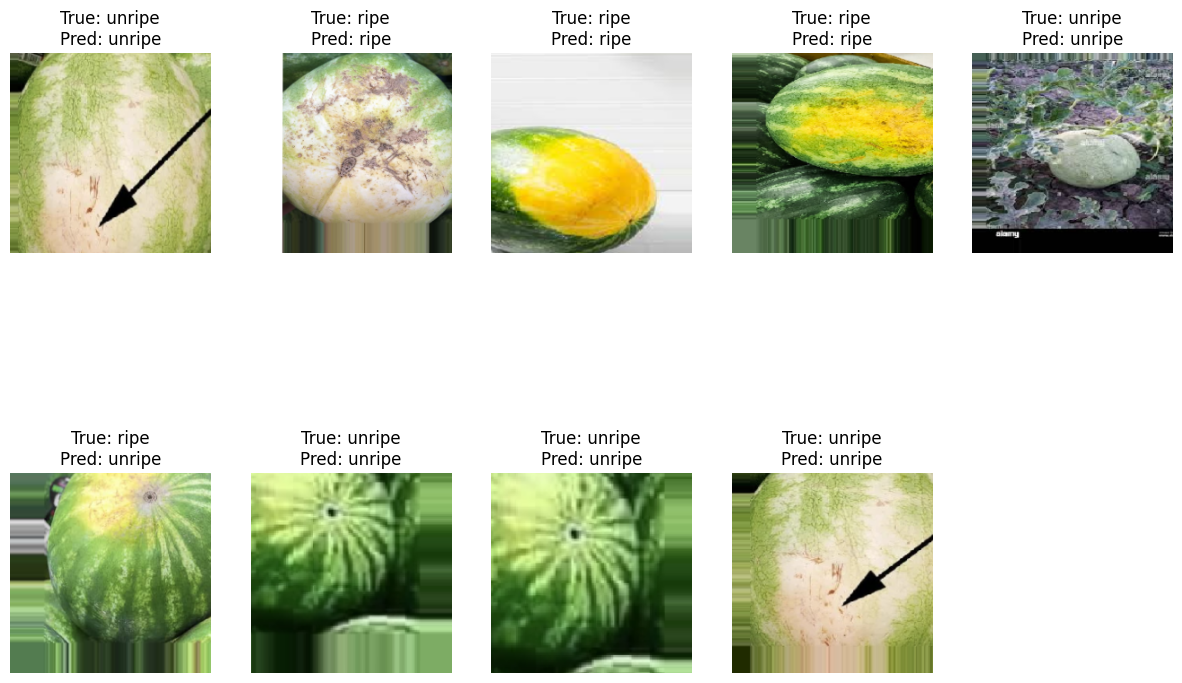

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation data
images, true_labels = next(validation_generator)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)

print("num images: ", len(images), " predictions: ", len(predictions))
# Function to visualize results
def plot_images(images, true_labels, predicted_classes, class_names, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    plt.show()

# Assuming you have a list of class names corresponding to your labels
class_names = list(validation_generator.class_indices.keys())

# Visualize predictions
plot_images(images, true_labels, predicted_classes, class_names)

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
checking_data_path = "/Users/shaurya/Downloads/watermelon/data_unchecked/"
# Step 1: Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,               # Normalize pixel values to [0, 1]
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Apply shear transformations
    zoom_range=0.2,                 # Randomly zoom in/out
    validation_split=0.2            # Split data for validation
)

# Step 2: Prepare your data with augmentation
data_generator = datagen.flow_from_directory(
    checking_data_path,  # Replace with your data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 3 images belonging to 1 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
num images:  3  predictions:  3


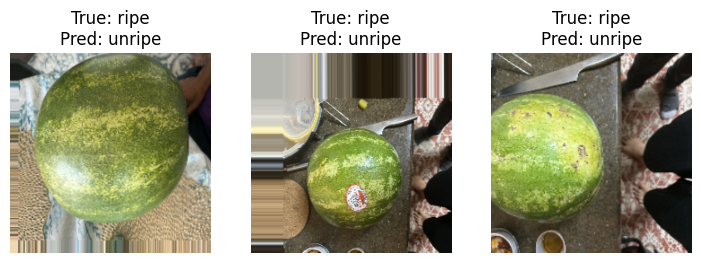

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation data
images, true_labels = next(data_generator)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)

print("num images: ", len(images), " predictions: ", len(predictions))
# Function to visualize results
def plot_images(images, true_labels, predicted_classes, class_names, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    plt.show()

# Assuming you have a list of class names corresponding to your labels
class_names = list(validation_generator.class_indices.keys())

# Visualize predictions
plot_images(images, true_labels, predicted_classes, class_names)